🎯 Desafio dia 91 — Segmentação de Clientes de Academia

📂 Dataset: desafio_dia_91_clientes_academia.csv

🔍 Contexto: Uma rede de academias deseja identificar padrões entre seus clientes com base em características como idade, objetivo, frequência semanal e tempo médio de treino. O objetivo é fazer uma segmentação automatizada para personalizar ofertas e planos de treino.

🛠️ Tarefas do desafio

🧹 Tratamento de dados
- Preencha os valores ausentes em tempo_treino_medio com a mediana global.

📊 Análise geral
- Qual é o objetivo mais comum entre clientes com mais de 40 anos?

- Existe diferença significativa no tempo_treino_medio entre os objetivos? (use groupby com mean())

📈 Visualização de dados
- Crie um gráfico de dispersão (scatter plot) relacionando idade e tempo_treino_medio, colorido por objetivo.

🤖 Machine Learning - Clusterização com K-Means
- Utilize KMeans para segmentar os clientes com base em:

    idade, frequencia_semanal, tempo_treino_medio

    Antes disso:

    Normalize os dados com StandardScaler

    Determine visualmente a quantidade ideal de clusters com o método do cotovelo (Elbow Method).

    Plote os clusters resultantes.

In [23]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score
from mpl_toolkits.mplot3d import Axes3D

In [3]:
df = pd.read_csv("desafio_dia_91_clientes_academia.csv")
df.head()

,id_cliente,idade,genero,frequencia_semanal,objetivo,tempo_treino_medio
0,5000,64,Outro,2,Reabilitação,32.8
1,5001,60,Masculino,5,Manter forma,56.1
2,5002,36,Feminino,3,Perder peso,83.7
3,5003,47,Masculino,6,Perder peso,38.0
4,5004,47,Feminino,2,Reabilitação,35.6


In [4]:
#Preencha os valores ausentes em tempo_treino_medio com a mediana global.
df["tempo_treino_medio"] = df["tempo_treino_medio"].fillna(df["tempo_treino_medio"].median())
df["tempo_treino_medio"].isna().sum()

0

In [8]:
#Qual é o objetivo mais comum entre clientes com mais de 40 anos?
idade40 = df[df["idade"] >= 40]
objetivo_comum_40anos = idade40.groupby("objetivo")["idade"].size().sort_values(ascending=False)
print(objetivo_comum_40anos)

objetivo
Ganhar massa    72
Reabilitação    67
Manter forma    62
Perder peso     62
Name: idade, dtype: int64


In [9]:
#Existe diferença significativa no tempo_treino_medio entre os objetivos? (use groupby com mean())
tempo_treino_objetivos = df.groupby("objetivo")["tempo_treino_medio"].mean()
print(tempo_treino_objetivos)

objetivo
Ganhar massa    51.700758
Manter forma    56.900794
Perder peso     53.736364
Reabilitação    55.219008
Name: tempo_treino_medio, dtype: float64


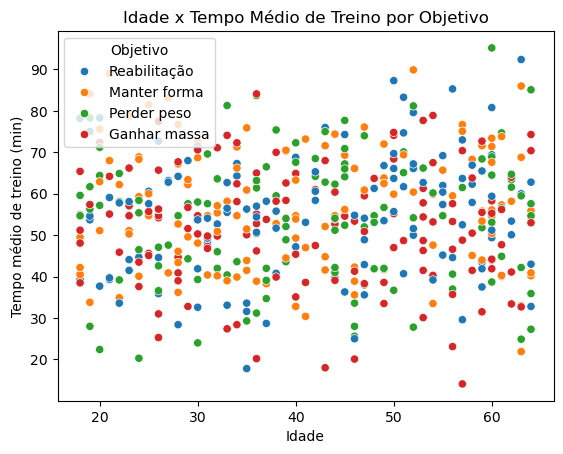

In [12]:
#Crie um gráfico de dispersão (scatter plot) relacionando idade e tempo_treino_medio, colorido por objetivo.
sns.scatterplot(df, x="idade", y="tempo_treino_medio", hue="objetivo")
plt.title("Idade x Tempo Médio de Treino por Objetivo")
plt.xlabel("Idade")
plt.ylabel("Tempo médio de treino (min)")
plt.legend(title="Objetivo")
plt.show()

In [16]:
#Machine Learning - Clusterização com K-Means
#Normalizar os dados
X = df[["idade", "frequencia_semanal", "tempo_treino_medio"]]
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

D:\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
D:\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
D:\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
D:\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than avai

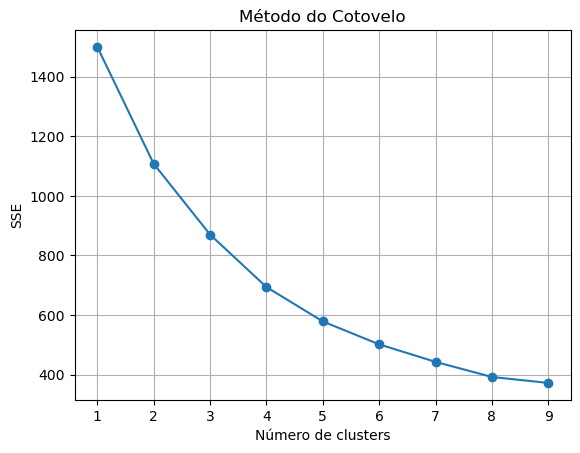

In [21]:
#Machine Learning - Clusterização com K-Means
#Elbow Method
sse = []
for k in range(1, 10):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    sse.append(kmeans.inertia_)

plt.plot(range(1, 10), sse, marker='o')
plt.title("Método do Cotovelo")
plt.xlabel("Número de clusters")
plt.ylabel("SSE")
plt.grid()
plt.show()

D:\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


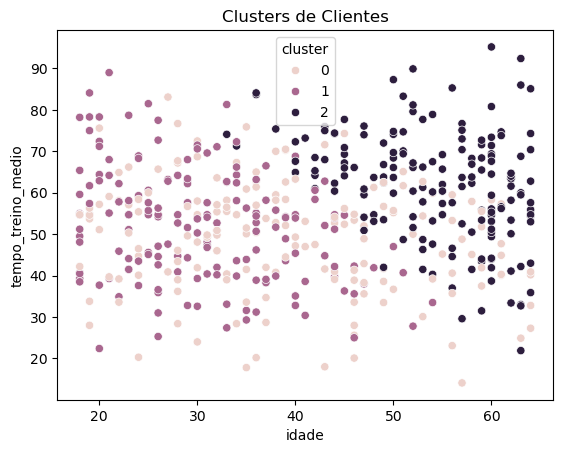

In [30]:
#Machine Learning - Clusterização com K-Means
kmeans = KMeans(n_clusters=3, random_state=42)
df["cluster"] = kmeans.fit_predict(X_scaled)

sns.scatterplot(data=df, x="idade", y="tempo_treino_medio", hue="cluster")
plt.title("Clusters de Clientes")
plt.show()